In [1]:
import os
import warnings

warnings.simplefilter(action="ignore")
os.environ["GRPC_VERBOSITY"] = "NONE"

# Prerequisites

Please make sure your environmental variables and dependencies are ready to use LLM services. Name of the environmental variables is arbitraray because langrila modules accepts that name as an argument.

In [2]:
from dotenv import load_dotenv

load_dotenv("../../.env_api")

True

# Import modules

Main modules are `LLMClient` module and `Agent` module. `LLMClient` module is inherited by each module for a specific client like OpenAI, Gemini or Anthropic.

In [3]:
from langrila import Agent
from langrila.anthropic import AnthropicClient
from langrila.aws import BedrockClient
from langrila.google import GoogleClient
from langrila.openai import OpenAIClient

Instantiating client modules and agents

In [4]:
# For OpenAI
openai_client = OpenAIClient(api_key_env_name="OPENAI_API_KEY")

# For Azure OpenAI
azure_openai_client = OpenAIClient(
    api_key_env_name="AZURE_API_KEY",
    api_type="azure",
    azure_api_version="2024-11-01-preview",
    azure_endpoint_env_name="AZURE_ENDPOINT",
    azure_deployment_env_name="AZURE_DEPLOYMENT_ID",
)

# For Gemini on Google AI Studio
google_dev_client = GoogleClient(api_key_env_name="GEMINI_API_KEY")

# For Gemini on Google Cloud VertexAI
vertexai_client = GoogleClient(
    api_type="vertexai",
    project_id_env_name="GOOGLE_CLOUD_PROJECT",
    location="us-central1",
)

# For Claude of Anthropic
anthropic_client = AnthropicClient(api_key_env_name="ANTHROPIC_API_KEY")

# For Claude of Amazon Bedrock
claude_bedrock_client = AnthropicClient(
    api_type="bedrock",
    aws_access_key_env_name="AWS_ACCESS_KEY",
    aws_secret_key_env_name="AWS_SECRET_KEY",
    aws_region="us-east-1",
)

# Converse API for AWS Bedrock
bedrock_client = BedrockClient(
    region_name="us-east-1",
    aws_access_key_env_name="AWS_ACCESS_KEY",
    aws_secret_key_env_name="AWS_SECRET_KEY",
)

In [5]:
openai_agent = Agent(
    client=openai_client,
    model="gpt-4o-mini-2024-07-18",
    temperature=0.0,
)

azure_openai_agent = Agent(
    client=azure_openai_client,
    model="gpt-4o-mini-2024-07-18",
    temperature=0.0,
)

google_agent = Agent(
    client=google_dev_client,
    model="gemini-2.0-flash-exp",
    temperature=0.0,
)

vertexai_agent = Agent(
    client=vertexai_client,
    model="gemini-2.0-flash-exp",
    temperature=0.0,
)

claude_agent = Agent(
    client=anthropic_client,
    model="claude-3-5-sonnet-20240620",
    temperature=0.0,
    max_tokens=500,
)

claude_bedrock_agent = Agent(
    client=claude_bedrock_client,
    model="anthropic.claude-3-sonnet-20240229-v1:0",
    temperature=0.0,
    max_tokens=500,
)

bedrock_agent = Agent(
    client=bedrock_client,
    modelId="us.amazon.nova-pro-v1:0",
)

# Image input

Here is a sample data.

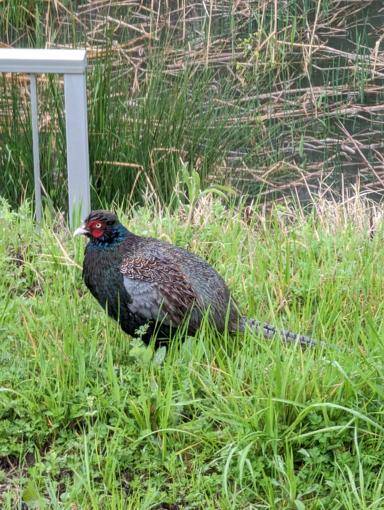

In [6]:
from langrila.sample import SampleData

image = SampleData.load_image()
image

Mainly there are two ways to input image to the agent. On the one hand, passing as a PIL image, on the other hand, specifying path to the image file. 

In [7]:
# As a PIL image
from langrila import ImagePrompt

prompt = [
    ImagePrompt(image=image),
    "Please describe this picture.",
]

resposne = openai_agent.generate_text(prompt)

print(resposne.contents[0].text)

[2025-01-14 10:09:05] DEBUG | Prompt: [ImagePrompt(image=/9j/4AAQSkZJRgABAQAA..., format=jpeg, resolution=None), TextPrompt(text='Please describe this picture.')]
[2025-01-14 10:09:05] INFO | root: Generating text


[2025-01-14 10:09:08] DEBUG | Response: [TextResponse(text='The image shows a bird standing on green grass near a body of water. The bird has a distinctive appearance with a mix of dark and iridescent feathers, a rounded body, and a long tail. It features a red face and a prominent crest. The background includes tall grasses and reeds, suggesting a natural, outdoor setting. There is also a white structure, possibly a railing or post, visible in the image.')]


The image shows a bird standing on green grass near a body of water. The bird has a distinctive appearance with a mix of dark and iridescent feathers, a rounded body, and a long tail. It features a red face and a prominent crest. The background includes tall grasses and reeds, suggesting a natural, outdoor setting. There is also a white structure, possibly a railing or post, visible in the image.


In [8]:
# As a path to an image file

prompt = [
    ImagePrompt(image="../data/sample.jpg"),
    "Please describe this picture.",
]

resposne = openai_agent.generate_text(prompt)

print(resposne.contents[0].text)

[2025-01-14 10:09:09] DEBUG | Prompt: [ImagePrompt(image=/9j/4AAQSkZJRgABAQAA..., format=jpeg, resolution=None), TextPrompt(text='Please describe this picture.')]
[2025-01-14 10:09:09] INFO | root: Generating text
[2025-01-14 10:09:11] DEBUG | Response: [TextResponse(text='The image shows a bird standing on green grass near a body of water. The bird has a predominantly dark body with iridescent feathers, and it features a distinctive red face and throat. The background includes tall grasses and reeds, suggesting a natural, outdoor setting. There is also a white structure, possibly a railing or post, visible in the upper left corner of the image.')]


The image shows a bird standing on green grass near a body of water. The bird has a predominantly dark body with iridescent feathers, and it features a distinctive red face and throat. The background includes tall grasses and reeds, suggesting a natural, outdoor setting. There is also a white structure, possibly a railing or post, visible in the upper left corner of the image.


You also can directly pass the path of an image.

In [9]:
prompt = [
    "../data/sample.jpg",
    "Please describe this picture.",
]

resposne = openai_agent.generate_text(prompt)

print(resposne.contents[0].text)

[2025-01-14 10:09:11] DEBUG | Prompt: [ImagePrompt(image=/9j/4AAQSkZJRgABAQAA..., format=jpeg, resolution=None), TextPrompt(text='Please describe this picture.')]
[2025-01-14 10:09:11] INFO | root: Generating text
[2025-01-14 10:09:14] DEBUG | Response: [TextResponse(text='The image shows a bird standing on green grass near a body of water. The bird has a predominantly dark body with a mix of iridescent feathers, and it features a distinctive red face and eye area. The background includes tall grasses and reeds, suggesting a natural, outdoor setting. There is also a white structure, possibly a railing or post, visible in the upper left corner of the image.')]


The image shows a bird standing on green grass near a body of water. The bird has a predominantly dark body with a mix of iridescent feathers, and it features a distinctive red face and eye area. The background includes tall grasses and reeds, suggesting a natural, outdoor setting. There is also a white structure, possibly a railing or post, visible in the upper left corner of the image.


In both way, `ImagePrompt` converts the image to base64 encoded format (decoded as utf-8 string), so it can be stored into conversation history as well as the text conversation.

Other client has the same interface

In [10]:
resposne = google_agent.generate_text(prompt)

print(resposne.contents[0].text)

[2025-01-14 10:09:14] DEBUG | Prompt: [ImagePrompt(image=/9j/4AAQSkZJRgABAQAA..., format=jpeg, resolution=None), TextPrompt(text='Please describe this picture.')]
[2025-01-14 10:09:14] INFO | root: Generating text


[2025-01-14 10:09:18] DEBUG | Response: [TextResponse(text="Certainly! Here's a description of the image:\n\n**Overall Scene:**\n\nThe image shows a pheasant standing in tall, green grass. The bird is positioned in the lower center of the frame, with a background of reeds and a body of water. There's also a white, rectangular structure visible on the left side of the image.\n\n**Pheasant:**\n\n*   The pheasant is the focal point of the image. It has dark, almost black plumage with intricate patterns of brown and gray on its back and wings.\n*   Its head is a striking dark color with a bright red patch around its eye.\n*   The bird is facing towards the left of the frame, with its body angled slightly towards the viewer.\n*   Its tail is long and extends towards the right side of the image.\n\n**Background:**\n\n*   The background consists of tall, thin reeds and grasses, suggesting a marshy or wetland environment.\n*   Behind the reeds, there appears to be a body of water, which is par

Certainly! Here's a description of the image:

**Overall Scene:**

The image shows a pheasant standing in tall, green grass. The bird is positioned in the lower center of the frame, with a background of reeds and a body of water. There's also a white, rectangular structure visible on the left side of the image.

**Pheasant:**

*   The pheasant is the focal point of the image. It has dark, almost black plumage with intricate patterns of brown and gray on its back and wings.
*   Its head is a striking dark color with a bright red patch around its eye.
*   The bird is facing towards the left of the frame, with its body angled slightly towards the viewer.
*   Its tail is long and extends towards the right side of the image.

**Background:**

*   The background consists of tall, thin reeds and grasses, suggesting a marshy or wetland environment.
*   Behind the reeds, there appears to be a body of water, which is partially obscured by the vegetation.
*   The white, rectangular structure on t

In [11]:
resposne = claude_agent.generate_text(prompt)

print(resposne.contents[0].text)

[2025-01-14 10:09:18] DEBUG | Prompt: [ImagePrompt(image=/9j/4AAQSkZJRgABAQAA..., format=jpeg, resolution=None), TextPrompt(text='Please describe this picture.')]
[2025-01-14 10:09:18] INFO | root: Generating text
[2025-01-14 10:09:21] DEBUG | Response: [TextResponse(text="This image shows a pheasant standing in tall grass. The bird has distinctive colorful plumage, with a dark blue-green head and neck, and a reddish face patch. Its body appears to be a mix of brown and gray feathers. The pheasant is surrounded by lush green vegetation, including grass and what looks like reeds or cattails in the background. There's also a glimpse of a white structure, possibly a fence or railing, visible in the upper left corner of the image. The setting suggests this is likely a natural or rural environment where pheasants typically live.")]


This image shows a pheasant standing in tall grass. The bird has distinctive colorful plumage, with a dark blue-green head and neck, and a reddish face patch. Its body appears to be a mix of brown and gray feathers. The pheasant is surrounded by lush green vegetation, including grass and what looks like reeds or cattails in the background. There's also a glimpse of a white structure, possibly a fence or railing, visible in the upper left corner of the image. The setting suggests this is likely a natural or rural environment where pheasants typically live.


In [12]:
response = bedrock_agent.generate_text(prompt)

print(response.contents[0].text)

[2025-01-14 10:09:21] DEBUG | Prompt: [ImagePrompt(image=/9j/4AAQSkZJRgABAQAA..., format=jpeg, resolution=None), TextPrompt(text='Please describe this picture.')]
[2025-01-14 10:09:21] INFO | root: Generating text


[2025-01-14 10:09:27] DEBUG | Response: [TextResponse(text='The image depicts a bird, specifically a male pheasant, standing on a grassy area. The pheasant has a dark, iridescent plumage with hints of green and purple, characteristic of its species. The bird has a distinctive red patch around its eyes and a blue-green sheen on its head. The grass is lush and green, with some patches of brown, indicating varying health of the vegetation. In the background, there is a body of water, possibly a pond or a small lake, surrounded by tall grasses and reeds. The water appears calm with some reflections visible on its surface. On the left side of the image, there is a section of a white metal fence, suggesting the presence of a boundary or a path. The overall setting appears to be a natural or semi-natural environment, likely a park or a wildlife reserve.')]


The image depicts a bird, specifically a male pheasant, standing on a grassy area. The pheasant has a dark, iridescent plumage with hints of green and purple, characteristic of its species. The bird has a distinctive red patch around its eyes and a blue-green sheen on its head. The grass is lush and green, with some patches of brown, indicating varying health of the vegetation. In the background, there is a body of water, possibly a pond or a small lake, surrounded by tall grasses and reeds. The water appears calm with some reflections visible on its surface. On the left side of the image, there is a section of a white metal fence, suggesting the presence of a boundary or a path. The overall setting appears to be a natural or semi-natural environment, likely a park or a wildlife reserve.


# PDF file analysis by LLM powered OCR

In default, local pdf file is treated as image for each pages using `pypdfium2`. If `pypdfium2` is not installed yet, please install it.

In [13]:
from langrila import PDFPrompt

prompt = [
    PDFPrompt(pdf="../data/README.pdf"),
    "What the langrila is motivated by?",
]

For OpenAI

In [14]:
response = openai_agent.generate_text(prompt)

print(response.contents[0].text)

[2025-01-14 10:09:27] DEBUG | Prompt: [PDFPrompt(pdf='../data/README.pdf', resolution_scale=2.5, image_resolution='high', name=''), TextPrompt(text='What the langrila is motivated by?')]
[2025-01-14 10:09:28] INFO | root: Generating text
[2025-01-14 10:09:37] DEBUG | Response: [TextResponse(text="Langri-La is motivated by several key issues identified in existing agent frameworks:\n\n1. **Complexity and Readability**: Existing frameworks can be overly abstract, making behavior unclear and reducing code readability due to the use of decorators and special operators.\n\n2. **State Management**: Handling an agent's state can be cumbersome, often requiring special arguments and complicating traceability.\n\n3. **Cumbersome Specifications**: The arguments and models of providers are frequently complex and cumbersome to follow.\n\nTo address these issues, Langri-La aims to provide a more intuitive and type-safe way to develop multi-agent systems, simplifying the process and improving code cl

Langri-La is motivated by several key issues identified in existing agent frameworks:

1. **Complexity and Readability**: Existing frameworks can be overly abstract, making behavior unclear and reducing code readability due to the use of decorators and special operators.

2. **State Management**: Handling an agent's state can be cumbersome, often requiring special arguments and complicating traceability.

3. **Cumbersome Specifications**: The arguments and models of providers are frequently complex and cumbersome to follow.

To address these issues, Langri-La aims to provide a more intuitive and type-safe way to develop multi-agent systems, simplifying the process and improving code clarity.


For Gemini

In [15]:
response = google_agent.generate_text(prompt)

print(response.contents[0].text)

[2025-01-14 10:09:37] DEBUG | Prompt: [PDFPrompt(pdf='../data/README.pdf', resolution_scale=2.5, image_resolution='high', name=''), TextPrompt(text='What the langrila is motivated by?')]
[2025-01-14 10:09:38] INFO | root: Generating text
[2025-01-14 10:09:43] DEBUG | Response: [TextResponse(text='Based on the provided text, Langrila is motivated by the following issues with existing agent frameworks:\n\n1.  **Hidden Behavior:** Existing frameworks often abstract away the behavior of agents, making it difficult to understand how they work and leading to unexpected results.\n2.  **Code Readability:** The use of decorators and other abstractions can make the code hard to read and understand, especially when developing agents.\n3.  **State Management:** The state of agents is often hidden, making it difficult to track and debug.\n4.  **Argument Passing:** Passing arguments to agents can be cumbersome, especially when dealing with complex data structures.\n5.  **Lack of Standardization:** T

Based on the provided text, Langrila is motivated by the following issues with existing agent frameworks:

1.  **Hidden Behavior:** Existing frameworks often abstract away the behavior of agents, making it difficult to understand how they work and leading to unexpected results.
2.  **Code Readability:** The use of decorators and other abstractions can make the code hard to read and understand, especially when developing agents.
3.  **State Management:** The state of agents is often hidden, making it difficult to track and debug.
4.  **Argument Passing:** Passing arguments to agents can be cumbersome, especially when dealing with complex data structures.
5.  **Lack of Standardization:** There is a lack of standardization in how agents are defined and how they communicate with each other.

Langrila aims to address these issues by providing a more transparent, readable, and standardized approach to building multi-agent systems. It emphasizes:

*   **Deliberately avoiding abstraction:** Th

For Claude

In [16]:
response = claude_agent.generate_text(prompt)

print(response.contents[0].text)

[2025-01-14 10:09:43] DEBUG | Prompt: [PDFPrompt(pdf='../data/README.pdf', resolution_scale=2.5, image_resolution='high', name=''), TextPrompt(text='What the langrila is motivated by?')]
[2025-01-14 10:09:43] INFO | root: Generating text
[2025-01-14 10:09:51] DEBUG | Response: [TextResponse(text="According to the README, Langrila is motivated by addressing several issues with existing agent frameworks:\n\n1. Often highly abstracted, making their behavior unclear at times and causing some limitations.\n2. Code readability issues derived from many decorators and special operators when developing agents using those frameworks.\n3. Handling an agent's state or context is annoying, typically requiring special arguments in functions and hidden state updates.\n4. The arguments, specifications, and available models of providers are frequently updated, making it cumbersome to follow.\n\nTo address these issues, Langrila introduces several features:\n\n1. Deliberately avoiding over-abstracting t

According to the README, Langrila is motivated by addressing several issues with existing agent frameworks:

1. Often highly abstracted, making their behavior unclear at times and causing some limitations.
2. Code readability issues derived from many decorators and special operators when developing agents using those frameworks.
3. Handling an agent's state or context is annoying, typically requiring special arguments in functions and hidden state updates.
4. The arguments, specifications, and available models of providers are frequently updated, making it cumbersome to follow.

To address these issues, Langrila introduces several features:

1. Deliberately avoiding over-abstracting the module.
2. No need for special arguments to inject context into tools.
3. Support for sub-agents as tools.
4. Unified message-response model independent of provider APIs.
5. Serializable conversation history.
6. Type-safe structured output.
7. Multi-modal I/O support.
8. Other features like automatic re

Converse API model for Bedrock such as Amazon Nova. 

Converse API supports analysis of the raw bytes of the PDF, so in langrila, this client is different from others on way to handle the PDF file.

In [17]:
response = bedrock_agent.generate_text(prompt)

print(response.contents[0].text)

[2025-01-14 10:09:51] DEBUG | Prompt: [PDFPrompt(pdf='../data/README.pdf', resolution_scale=2.5, image_resolution='high', name=''), TextPrompt(text='What the langrila is motivated by?')]
[2025-01-14 10:09:51] INFO | root: Generating text
[2025-01-14 10:10:03] DEBUG | Response: [TextResponse(text='Langrila is motivated by several key factors aimed at improving the development and usability of multi-agent systems, particularly those leveraging large language models (LLMs). Here’s a breakdown of the motivations behind Langrila:\n\n### Motivations for Langrila\n\n1. **Simplicity and Clarity**:\n   - **Avoiding Over-Abstraction**: Many existing agent frameworks are highly abstracted, which can obscure the behavior of agents and impose limitations. Langrila aims to provide a more straightforward interface that maintains clarity and ease of use.\n   - **Code Readability**: The use of many decorators and special operators in other frameworks can reduce code readability. Langrila strives to kee

Langrila is motivated by several key factors aimed at improving the development and usability of multi-agent systems, particularly those leveraging large language models (LLMs). Here’s a breakdown of the motivations behind Langrila:

### Motivations for Langrila

1. **Simplicity and Clarity**:
   - **Avoiding Over-Abstraction**: Many existing agent frameworks are highly abstracted, which can obscure the behavior of agents and impose limitations. Langrila aims to provide a more straightforward interface that maintains clarity and ease of use.
   - **Code Readability**: The use of many decorators and special operators in other frameworks can reduce code readability. Langrila strives to keep the code as clean and readable as possible.

2. **State Management**:
   - **Annoying State Handling**: Managing an agent’s state or context often requires special arguments and hidden updates, leading to confusion. Langrila seeks to make state management more transparent and intuitive.
   - **Regular

You can also specify the path to a local pdf file as it is because it is automatically converted to `PDFPrompt` internally.

In [18]:
prompt = [
    "../data/README.pdf",
    "Please summarize this document.",
]

In [19]:
response = google_agent.generate_text(prompt)

print(response.contents[0].text)

[2025-01-14 10:10:03] DEBUG | Prompt: [PDFPrompt(pdf='../data/README.pdf', resolution_scale=2.5, image_resolution='high', name=''), TextPrompt(text='Please summarize this document.')]


[2025-01-14 10:10:04] INFO | root: Generating text
[2025-01-14 10:10:10] DEBUG | Response: [TextResponse(text="Certainly! Here's a summary of the provided document, which is the README for the `langri-la` Python package:\n\n**Overview:**\n\n`langri-la` is a Python package designed to simplify the creation of multi-agent systems. It aims to address some limitations of existing agent frameworks by providing a more structured and transparent approach to agent development. The package is currently under active development and is undergoing significant interface changes.\n\n**Key Motivations:**\n\n*   **Code Readability:**  Existing frameworks can be difficult to understand due to the use of decorators and hidden state. `langri-la` aims to make agent behavior more explicit.\n*   **State Management:**  The package emphasizes clear state management and avoids hidden state, making it easier to understand how agents interact.\n*   **Provider Independence:**  `langri-la` is designed to be provid

Certainly! Here's a summary of the provided document, which is the README for the `langri-la` Python package:

**Overview:**

`langri-la` is a Python package designed to simplify the creation of multi-agent systems. It aims to address some limitations of existing agent frameworks by providing a more structured and transparent approach to agent development. The package is currently under active development and is undergoing significant interface changes.

**Key Motivations:**

*   **Code Readability:**  Existing frameworks can be difficult to understand due to the use of decorators and hidden state. `langri-la` aims to make agent behavior more explicit.
*   **State Management:**  The package emphasizes clear state management and avoids hidden state, making it easier to understand how agents interact.
*   **Provider Independence:**  `langri-la` is designed to be provider-agnostic, allowing you to easily switch between different LLM providers.
*   **Structured Communication:**  It uses a 

# Video input

Langrila using `imageio` and `imageio-ffmpeg` to sample frames from the video. If the two packages are not installed yet, please install them.

Download sample video of the generative-ai resource using gcloud command

In [22]:
# !gcloud storage cp gs://cloud-samples-data/generative-ai/video/behind_the_scenes_pixel.mp4 ../data/

In [ ]:
prompt = [
    "../data/behind_the_scenes_pixel.mp4",
    "Please summarize this video.",
]

# # Same as :
# from langrila import VideoPrompt

# prompt = [
#     VideoPrompt(video="../data/behind_the_scenes_pixel.mp4", fps=1.0),
#     "Please summarize this video.",
# ]

For Gemini

In [27]:
response = vertexai_agent.generate_text(prompt)

print(response.contents[0].text)

[2025-01-02 22:17:09] DEBUG | Prompt: [VideoPrompt(video='../data/behind_the_scenes_pixel.mp4', fps=1.0, image_resolution='low'), TextPrompt(text='Please summarize this video.')]
[2025-01-02 22:17:46] INFO | root: Generating text
[2025-01-02 22:20:21] DEBUG | Response: [TextResponse(text="Certainly! Here's a summary of the video you provided:\n\n**Overall Theme:**\n\nThe video is a behind-the-scenes look at the making of a commercial for Google Pixel 7's Guided Frame feature, which is designed to help people with visual impairments take better photos. It showcases the creative process, the technology involved, and the people behind the scenes.\n\n**Key Elements:**\n\n1.  **Artificial Snow Creation:** The video opens with a person on a ladder using a machine to create artificial snow in a park setting. This is likely for a scene in the commercial.\n\n2.  **Filming in the Snow:** We see a scene being filmed with two actors walking in the artificial snow, while a camera crew captures the 

Certainly! Here's a summary of the video you provided:

**Overall Theme:**

The video is a behind-the-scenes look at the making of a commercial for Google Pixel 7's Guided Frame feature, which is designed to help people with visual impairments take better photos. It showcases the creative process, the technology involved, and the people behind the scenes.

**Key Elements:**

1.  **Artificial Snow Creation:** The video opens with a person on a ladder using a machine to create artificial snow in a park setting. This is likely for a scene in the commercial.

2.  **Filming in the Snow:** We see a scene being filmed with two actors walking in the artificial snow, while a camera crew captures the footage.

3.  **Director Introduction:** The director, Adam Morse, is introduced. He is shown on set and later in the video, directing scenes.

4.  **Hospital Scene:** The video shows a scene being filmed in a hospital room, with a camera operator using a handheld rig.

5.  **Director Reviewing Foot

NOTE: For OpenAI Chat Completion, understanding the video is not supported explicitly, but sampled frames from the video can be input and the model try to catch the contents of the video. However you should be aware of the number of tokens for cost management and image input limitation of OpenAI API.

# Audio input

In [6]:
prompt = [
    "../data/pixel.mp3",
    "Please summarize this audio.",
]

# # Same as :
# from langrila import AudioPrompt

# prompt = [
#     AudioPrompt(audio="../data/pixel.mp3"),
#     "Please summarize this audio.",
# ]

For Gemini

In [ ]:
response = vertexai_agent.generate_text(prompt)

In [ ]:
print(response.contents[0].text)

# Direct input from cloud resource

Gemini on VertexAI supports the input from the GCS. Here is an example of image understanding on GCS using sample image of generative-ai resource in langrila.

In [6]:
from langrila import URIPrompt

prompt = [
    URIPrompt(uri="gs://cloud-samples-data/generative-ai/image/a-man-and-a-dog.png"),
    "Please describe this picture.",
]

In [7]:
response = vertexai_agent.generate_text(prompt)

print(response.contents[0].text)

[2025-01-02 22:58:29] DEBUG | Prompt: [URIPrompt(uri='gs://cloud-samples-data/generative-ai/image/a-man-and-a-dog.png', mime_type='image/png'), TextPrompt(text='Please describe this picture.')]
[2025-01-02 22:58:29] INFO | root: Generating text
[2025-01-02 22:58:34] DEBUG | Response: [TextResponse(text="Certainly! Here's a description of the image:\n\n**Overall Scene:**\n\nThe image is a close-up, slightly angled shot, likely taken with a phone camera. It appears to be a selfie featuring a man and a dog. The setting is indoors, in what seems to be a living room.\n\n**Man:**\n\n*   He is a middle-aged man with dark, slightly wavy hair and a beard.\n*   He has a warm, friendly smile and is looking directly at the camera.\n*   He is wearing a blue, textured knit sweater.\n*   He is positioned on the right side of the frame, with his arm extended to hold the camera.\n\n**Dog:**\n\n*   The dog is a medium-sized mixed breed with a tan and black coat.\n*   It has floppy ears, one of which is 

Certainly! Here's a description of the image:

**Overall Scene:**

The image is a close-up, slightly angled shot, likely taken with a phone camera. It appears to be a selfie featuring a man and a dog. The setting is indoors, in what seems to be a living room.

**Man:**

*   He is a middle-aged man with dark, slightly wavy hair and a beard.
*   He has a warm, friendly smile and is looking directly at the camera.
*   He is wearing a blue, textured knit sweater.
*   He is positioned on the right side of the frame, with his arm extended to hold the camera.

**Dog:**

*   The dog is a medium-sized mixed breed with a tan and black coat.
*   It has floppy ears, one of which is slightly bent.
*   The dog is looking directly at the camera with a calm and attentive expression.
*   It is positioned to the left of the man, close to him.

**Background:**

*   The background is a bit blurred, suggesting a shallow depth of field.
*   We can see a gray sofa, a wooden speaker, a lamp, and a window with

Actually image is like this.

In [ ]:
# ! gcloud storage cp gs://cloud-samples-data/generative-ai/image/a-man-and-a-dog.png ../data/

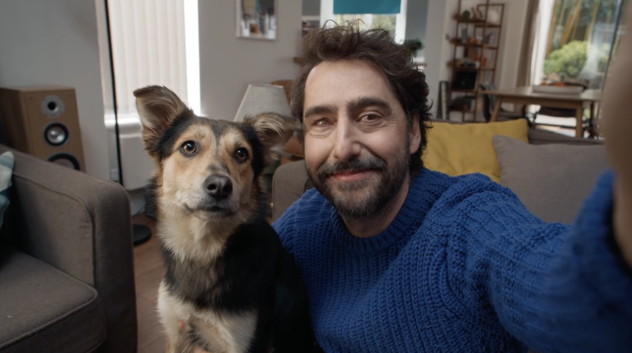

In [9]:
from PIL import Image

image = Image.open("../data/a-man-and-a-dog.png")

image.resize((image.width // 4, image.height // 4))

# Image Generation

For the agent with the google client supports image generation using Imagen 3.

In [ ]:
vertexai_agent = Agent(
    client=vertexai_client,
    model="imagen-3.0-generate-001",
)

prompt = "Please generate the image of a cat."

response = vertexai_agent.generate_image(prompt)

[2025-01-02 22:50:58] INFO | Generating image


`Response` object contains `ImageResponse` object. Image data is encoded with base64.

In [7]:
response.contents[0]

ImageResponse(image=iVBORw0KGgoAAAANSUhE..., format=png)

Utility method to show the image data as PIL image is implemented.

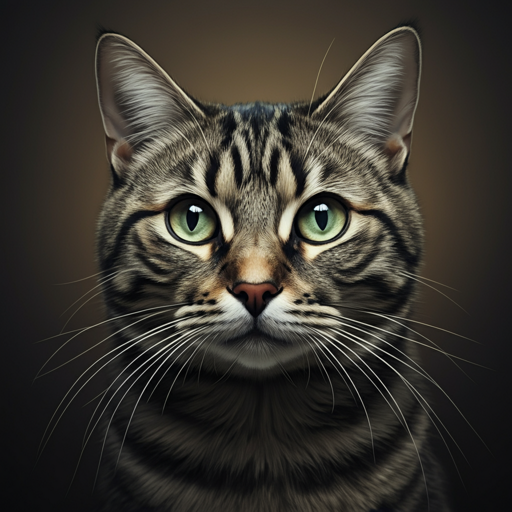

In [8]:
img = response.contents[0].decode()

img.resize((img.width // 2, img.height // 2))

# Audio generation

OpenAI is experimentally rolling out the audio generation model. Langrila supports native parameters of the provider API, so you can access those models in within the langrila framework.

In [9]:
from langrila import InMemoryConversationMemory

openai_agent = Agent(
    client=openai_client,
    model="gpt-4o-audio-preview",
    temperature=0.0,
    modalities=["text", "audio"],
    audio={"voice": "alloy", "format": "wav"},
    conversation_memory=InMemoryConversationMemory(),
)

response = openai_agent.generate_audio(prompt="Hello, how are you?")

[2025-01-02 22:51:35] DEBUG | Prompt: [TextPrompt(text='Hello, how are you?')]
[2025-01-02 22:51:35] INFO | Generating audio


`Response` object includes `AudioResponse` object. You can convert the audio data to numpy array by `.asarray()` method of the `AudioResponse`.

In [10]:
# audio in notebook

from IPython.display import Audio

Audio(data=response.contents[0].asarray(), rate=response.contents[0].sr)

You can follow the conversation when you use conversation memory.

In [11]:
response = openai_agent.generate_audio(prompt="Could you say that again?")

[2025-01-02 22:51:48] DEBUG | Prompt: [TextPrompt(text='Could you say that again?')]
[2025-01-02 22:51:48] INFO | Generating audio


In [12]:
Audio(data=response.contents[0].asarray(), rate=response.contents[0].sr)

In [13]:
openai_agent.load_history()

[Prompt(type='Prompt', role='user', contents=[TextPrompt(text='Hello, how are you?')], name=None),
 Response(type='Response', role='assistant', contents=[AudioResponse(audio=UklGRoRhAgBXQVZFZm10..., sr=24000, mime_type=audio/wav)], usage=Usage(model_name=None, prompt_tokens=0, output_tokens=0), raw=None, name=None, is_last_chunk=None, prompt=None),
 Prompt(type='Prompt', role='user', contents=[TextPrompt(text='Could you say that again?')], name=None),
 Response(type='Response', role='assistant', contents=[AudioResponse(audio=UklGRiQ5AwBXQVZFZm10..., sr=24000, mime_type=audio/wav)], usage=Usage(model_name=None, prompt_tokens=0, output_tokens=0), raw=None, name=None, is_last_chunk=None, prompt=None)]

This feature is still experimental.